#Relative Humidity Prediction
##Daily Weather Data Analysis

 In this notebook, we will use scikit-learn to perform a decision tree based classification of weather data.



In [112]:
#Importing the necessary libraries

In [113]:
#Importing manipulating libraries
import numpy as np
import pandas as pd
#importing visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


##Creating a Pandas DataFrame from a CSV file

In [114]:
#Read file from pd
data = pd.read_csv('ml_sensor_weather_data.csv')
data.head()

,air_pressure,air_temperature,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,rain_accumulation,rain_duration,relative_humidity,relative_humidity_pm,row_number
0,919.060000,23.790000,281.100000,3.080354,275.400000,3.863283,0.89,4.0,43.420000,37.160000,0
1,917.347688,21.891024,101.935179,2.443009,140.471549,3.533324,0.00,0.0,24.328697,20.426597,1
2,923.040000,15.910000,51.000000,17.067852,63.700000,22.100967,0.00,20.0,8.900000,14.460000,2
3,920.502751,21.188275,198.832133,4.337363,211.203341,5.190045,0.00,0.0,12.189102,12.742547,3
4,921.160000,6.830000,277.800000,1.856660,136.500000,2.863283,8.90,14730.0,92.410000,76.740000,4


##The data have been provided from some sensor readings in a file named ml_sensor_weather_data.csv from a blue-chip company who is growing her IoT capabilities. The data contains readings made by the sensors in a day between morning and afternoon periods. The columns of the data are described below.
air_pressure: Air pressure readings in the morning (in hectopascals)
air_temperature: Air temperature in degrees Celsius      
avg_wind_direction: Average wind direction in degrees
avg_wind_speed: Average wind speed in miles per hour
max_wind_direction: Maximum wind direction in degrees
max_wind_speed: Maximum wind speed in miles per hour          
rain_accumulation: Rain accumulation in millimetres       
rain_duration: Rain duration in seconds
relative_humidity: Relative humidity in percent  
relative_humidity_pm: Afternoon Relative humidity in percent   
row_number: unique row number
 
All measurement was taken in the morning except relative_humidity_pm which was taken in the afternoon


In [115]:
data.tail()

,air_pressure,air_temperature,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,rain_accumulation,rain_duration,relative_humidity,relative_humidity_pm,row_number
1090,918.90,17.28,192.9,3.869906,207.3,5.212070,0.0,0.0,26.02,38.18,1090
1091,918.71,9.76,241.6,1.811921,227.4,2.371156,0.0,0.0,90.35,73.34,1091
1092,916.60,21.72,189.3,3.064608,200.8,3.892276,0.0,0.0,45.59,52.31,1092
1093,912.60,14.67,172.7,3.825167,189.1,4.764682,0.0,0.0,64.84,58.28,1093
1094,921.53,25.39,97.1,3.265932,125.9,4.451511,0.0,0.0,14.56,15.10,1094


##Performing Exploratory Data Analysis to see relationship between 

In [116]:
data.corr()

,air_pressure,air_temperature,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,rain_accumulation,rain_duration,relative_humidity,relative_humidity_pm,row_number
air_pressure,1.000000,-0.048998,-0.316453,0.235084,-0.293337,0.252443,-0.090322,-0.105114,-0.431873,-0.479500,-0.030261
air_temperature,-0.048998,1.000000,-0.024590,-0.286353,-0.088948,-0.283636,-0.212568,-0.266144,-0.587521,-0.497869,0.045170
avg_wind_direction,-0.316453,-0.024590,1.000000,-0.432590,0.871310,-0.456209,0.126171,0.122507,0.355457,0.393235,-0.007876
avg_wind_speed,0.235084,-0.286353,-0.432590,1.000000,-0.355297,0.995326,0.017123,0.018259,-0.090739,-0.146113,-0.022282
max_wind_direction,-0.293337,-0.088948,0.871310,-0.355297,1.000000,-0.379263,0.104958,0.092143,0.377268,0.415522,0.004705
max_wind_speed,0.252443,-0.283636,-0.456209,0.995326,-0.379263,1.000000,0.019181,0.027378,-0.103972,-0.166618,-0.014067
rain_accumulation,-0.090322,-0.212568,0.126171,0.017123,0.104958,0.019181,1.000000,0.731405,0.243245,0.197875,-0.003222
rain_duration,-0.105114,-0.266144,0.122507,0.018259,0.092143,0.027378,0.731405,1.000000,0.316200,0.281773,-0.002079
relative_humidity,-0.431873,-0.587521,0.355457,-0.090739,0.377268,-0.103972,0.243245,0.316200,1.000000,0.883086,-0.025692
relative_humidity_pm,-0.479500,-0.497869,0.393235,-0.146113,0.415522,-0.166618,0.197875,0.281773,0.883086,1.000000,-0.018546


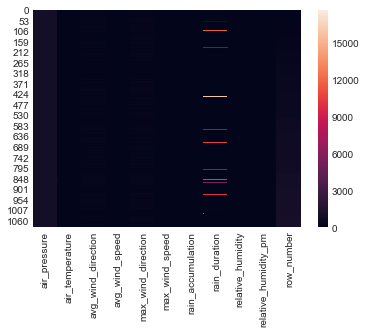

In [117]:
sns.heatmap(data)

##Performing Exploratory Data Analysis for missing value

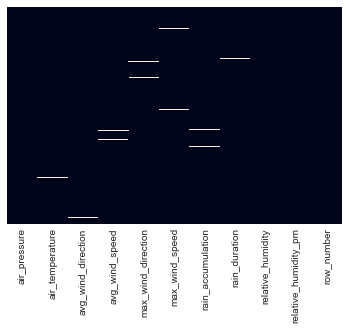

In [119]:

sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)

In [120]:
#Check if there is null value
data[data.isnull().any(axis=1)]

,air_pressure,air_temperature,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,rain_accumulation,rain_duration,relative_humidity,relative_humidity_pm,row_number
16,917.890000,NaN,169.200000,2.192201,196.800000,2.930391,1.200,0.000000,48.990000,51.190000,16
111,915.290000,14.900000,182.600000,15.613841,189.000000,NaN,0.000,0.000000,21.500000,29.690000,111
177,915.900000,NaN,183.300000,4.719943,189.900000,5.346287,0.000,0.000000,29.260000,46.500000,177
262,923.596607,14.655888,47.737753,10.636273,67.145843,13.671423,0.000,NaN,17.990876,16.461685,262
277,920.480000,17.000000,194.400000,2.751436,NaN,3.869906,0.000,0.000000,52.580000,54.030000,277
334,916.230000,24.300000,149.100000,2.751436,187.500000,4.183078,NaN,1480.000000,31.880000,32.900000,334
358,917.440000,14.730000,55.100000,10.021491,NaN,12.705819,0.000,0.000000,13.880000,25.930000,358
361,920.444946,18.778803,49.823346,21.520177,61.886944,25.549112,NaN,40.364018,12.278715,7.618649,361
381,918.480000,19.190000,90.900000,3.467257,89.400000,4.406772,NaN,0.000000,20.640000,14.350000,381
409,NaN,19.918796,65.880616,4.328594,78.570923,5.216734,0.000,0.000000,18.487385,20.356594,409


In [121]:
data.shape

(1095, 11)

In [97]:
data.dropna()


,air_pressure,air_temperature,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,rain_accumulation,rain_duration,relative_humidity,relative_humidity_pm,row_number
0,919.060000,23.790000,281.100000,3.080354,275.400000,3.863283,0.89,4.0,43.420000,37.160000,0
1,917.347688,21.891024,101.935179,2.443009,140.471549,3.533324,0.00,0.0,24.328697,20.426597,1
2,923.040000,15.910000,51.000000,17.067852,63.700000,22.100967,0.00,20.0,8.900000,14.460000,2
3,920.502751,21.188275,198.832133,4.337363,211.203341,5.190045,0.00,0.0,12.189102,12.742547,3
4,921.160000,6.830000,277.800000,1.856660,136.500000,2.863283,8.90,14730.0,92.410000,76.740000,4
5,915.300000,25.780000,182.800000,9.932014,189.000000,10.983375,0.02,170.0,35.130000,33.930000,5
6,915.598868,21.135169,177.875407,3.745587,186.606696,4.589632,0.00,0.0,10.657422,21.385657,6
7,918.070000,10.950000,242.400000,2.527742,271.600000,3.646212,0.00,0.0,80.470000,74.920000,7
8,920.080000,26.990000,40.700000,4.518619,63.000000,5.883152,0.00,0.0,29.580000,24.030000,8
9,915.010000,8.610000,163.100000,4.943637,195.900000,6.576604,0.00,0.0,88.600000,68.050000,9


In [122]:
del data['row_number'] #not needed as it was repeated

In [123]:
data.shape


(1095, 10)

In [124]:
data.columns

Index(['air_pressure', 'air_temperature', 'avg_wind_direction',
       'avg_wind_speed', 'max_wind_direction', 'max_wind_speed',
       'rain_accumulation', 'rain_duration', 'relative_humidity',
       'relative_humidity_pm'],
      dtype='object')

In [125]:

data_num = data.select_dtypes(include=[np.number]).copy()

In [126]:
data_num.replace(np.nan, 0, inplace=True)

In [127]:
data_num.shape

(1095, 10)

In [173]:
X = data_num.iloc[:,:9].values
y = data_num.iloc[:,9].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [174]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [175]:
y_predict = lin_reg.predict(X_test)
y_predict

array([38.09753052, 21.41084556, 66.81344309, 17.40976032, 70.21092554,
       48.01377786, 72.46665767, 33.05709383, 76.68201776, 26.96503286,
       21.05291808, 15.57542861, 33.91770806, 78.78773677, 23.53930719,
       31.09253156, 22.34441807, 15.64984382, 21.73686708, 60.04390998,
       19.59740043, 67.2762848 , 37.21192343, 21.34251658, 24.79753217,
       13.1353165 , 19.28036249, 67.44337683, 25.31684959, 34.95093461,
       21.93220577, 12.28094156, 79.37150105, 78.86007827, 27.06486047,
       26.41347701, 18.949545  , 14.82686609, 18.47900118, 40.28990309,
       28.36149657, 75.27357655, 29.56850402, 11.17725947, 71.13883198,
       37.96836734, 24.76429832, 23.94750559, 45.87855999, 22.76171934,
       15.95925781, 34.0134464 , 14.06708255, 20.37742531, 41.58144291,
       19.00104654, 65.72681103, 18.85400615, 32.65402672, 53.56233633,
       22.39625296, 28.59328818, 16.8294341 , 19.31823616, 22.36227248,
       49.79166874, 25.23977943, 49.20921352, 50.5091035 , 21.29

In [178]:
#calculating the coeffiecents
print(lin_reg.coef_)

[-6.74132985e-03 -3.97358750e-02  2.63708983e-03  1.04811644e+00
  2.12842376e-02 -1.05889210e+00 -7.59837740e-01  7.21344802e-04
  7.40867354e-01]


In [180]:
print(lin_reg.intercept_)

14.94177831535476


In [176]:
from sklearn.metrics import r2_score
r2_score(y_test, y_predict)

0.7621957699081181

In [130]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly, y)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [181]:
from sklearn.metrics import r2_score
r2_score(y_test, y_predict)

0.7621957699081181

In [131]:
#make a copy of the data that we will use and manipulate
# here we are adding a new column called high_humidity_label
data_clean = data_num.copy()
data_clean['high_humidity_label'] = (data_clean['relative_humidity_pm'] > 29.99)*1 #multiply the true/false values by 1 
#to turn the result into integer values
print(data_clean['high_humidity_label'])

0       1
1       0
2       0
3       0
4       1
5       1
6       0
7       1
8       0
9       1
10      1
11      1
12      1
13      0
14      0
15      0
16      1
17      0
18      1
19      0
20      0
21      1
22      0
23      1
24      0
25      1
26      1
27      1
28      1
29      1
       ..
1065    1
1066    0
1067    1
1068    1
1069    1
1070    1
1071    1
1072    0
1073    0
1074    1
1075    0
1076    0
1077    1
1078    0
1079    1
1080    0
1081    0
1082    1
1083    1
1084    1
1085    1
1086    1
1087    1
1088    1
1089    1
1090    1
1091    1
1092    1
1093    1
1094    0
Name: high_humidity_label, Length: 1095, dtype: int32


In [ ]:
#Runing EDA on the target variable
#style : dict, None, or one of {darkgrid, whitegrid, dark, white, ticks} A dictionary of parameters or the name of a preconfigured set
sns.set_style('whitegrid')

#Show the counts of observations in each categorical bin using bars.
#A count plot can be thought of as a histogram across a categorical, instead
#of quantitative, variable.

#palette : palette name, list, or dict, optional
sns.countplot(x='high_humidity_label',data=data_clean,palette='RdBu_r')

In [134]:
#store high_humidity_label labels into y
y=data_clean[['high_humidity_label']].copy()
#y

In [135]:
#compare the original and the y
data_clean['relative_humidity_pm'].head()

0    37.160000
1    20.426597
2    14.460000
3    12.742547
4    76.740000
Name: relative_humidity_pm, dtype: float64

In [136]:
y.head()

,high_humidity_label
0,1
1,0
2,0
3,0
4,1


In [137]:
#calling out the features
data_clean.columns

Index(['air_pressure', 'air_temperature', 'avg_wind_direction',
       'avg_wind_speed', 'max_wind_direction', 'max_wind_speed',
       'rain_accumulation', 'rain_duration', 'relative_humidity',
       'relative_humidity_pm', 'high_humidity_label'],
      dtype='object')

In [138]:
#select the morning feature i.e.those at 9am
am_features = ['air_pressure', 'air_temperature', 'avg_wind_direction',
       'avg_wind_speed', 'max_wind_direction', 'max_wind_speed',
       'rain_accumulation', 'rain_duration', 'relative_humidity',
       'relative_humidity_pm']

In [140]:
#Assigning the independent variable X to its features
# we simply want to do y=f(x) 
X = data_clean[am_features].copy()

In [142]:
#Checking X features
X.columns

Index(['air_pressure', 'air_temperature', 'avg_wind_direction',
       'avg_wind_speed', 'max_wind_direction', 'max_wind_speed',
       'rain_accumulation', 'rain_duration', 'relative_humidity',
       'relative_humidity_pm'],
      dtype='object')

In [143]:
#checking for the feature of the target variables
y.columns

Index(['high_humidity_label'], dtype='object')

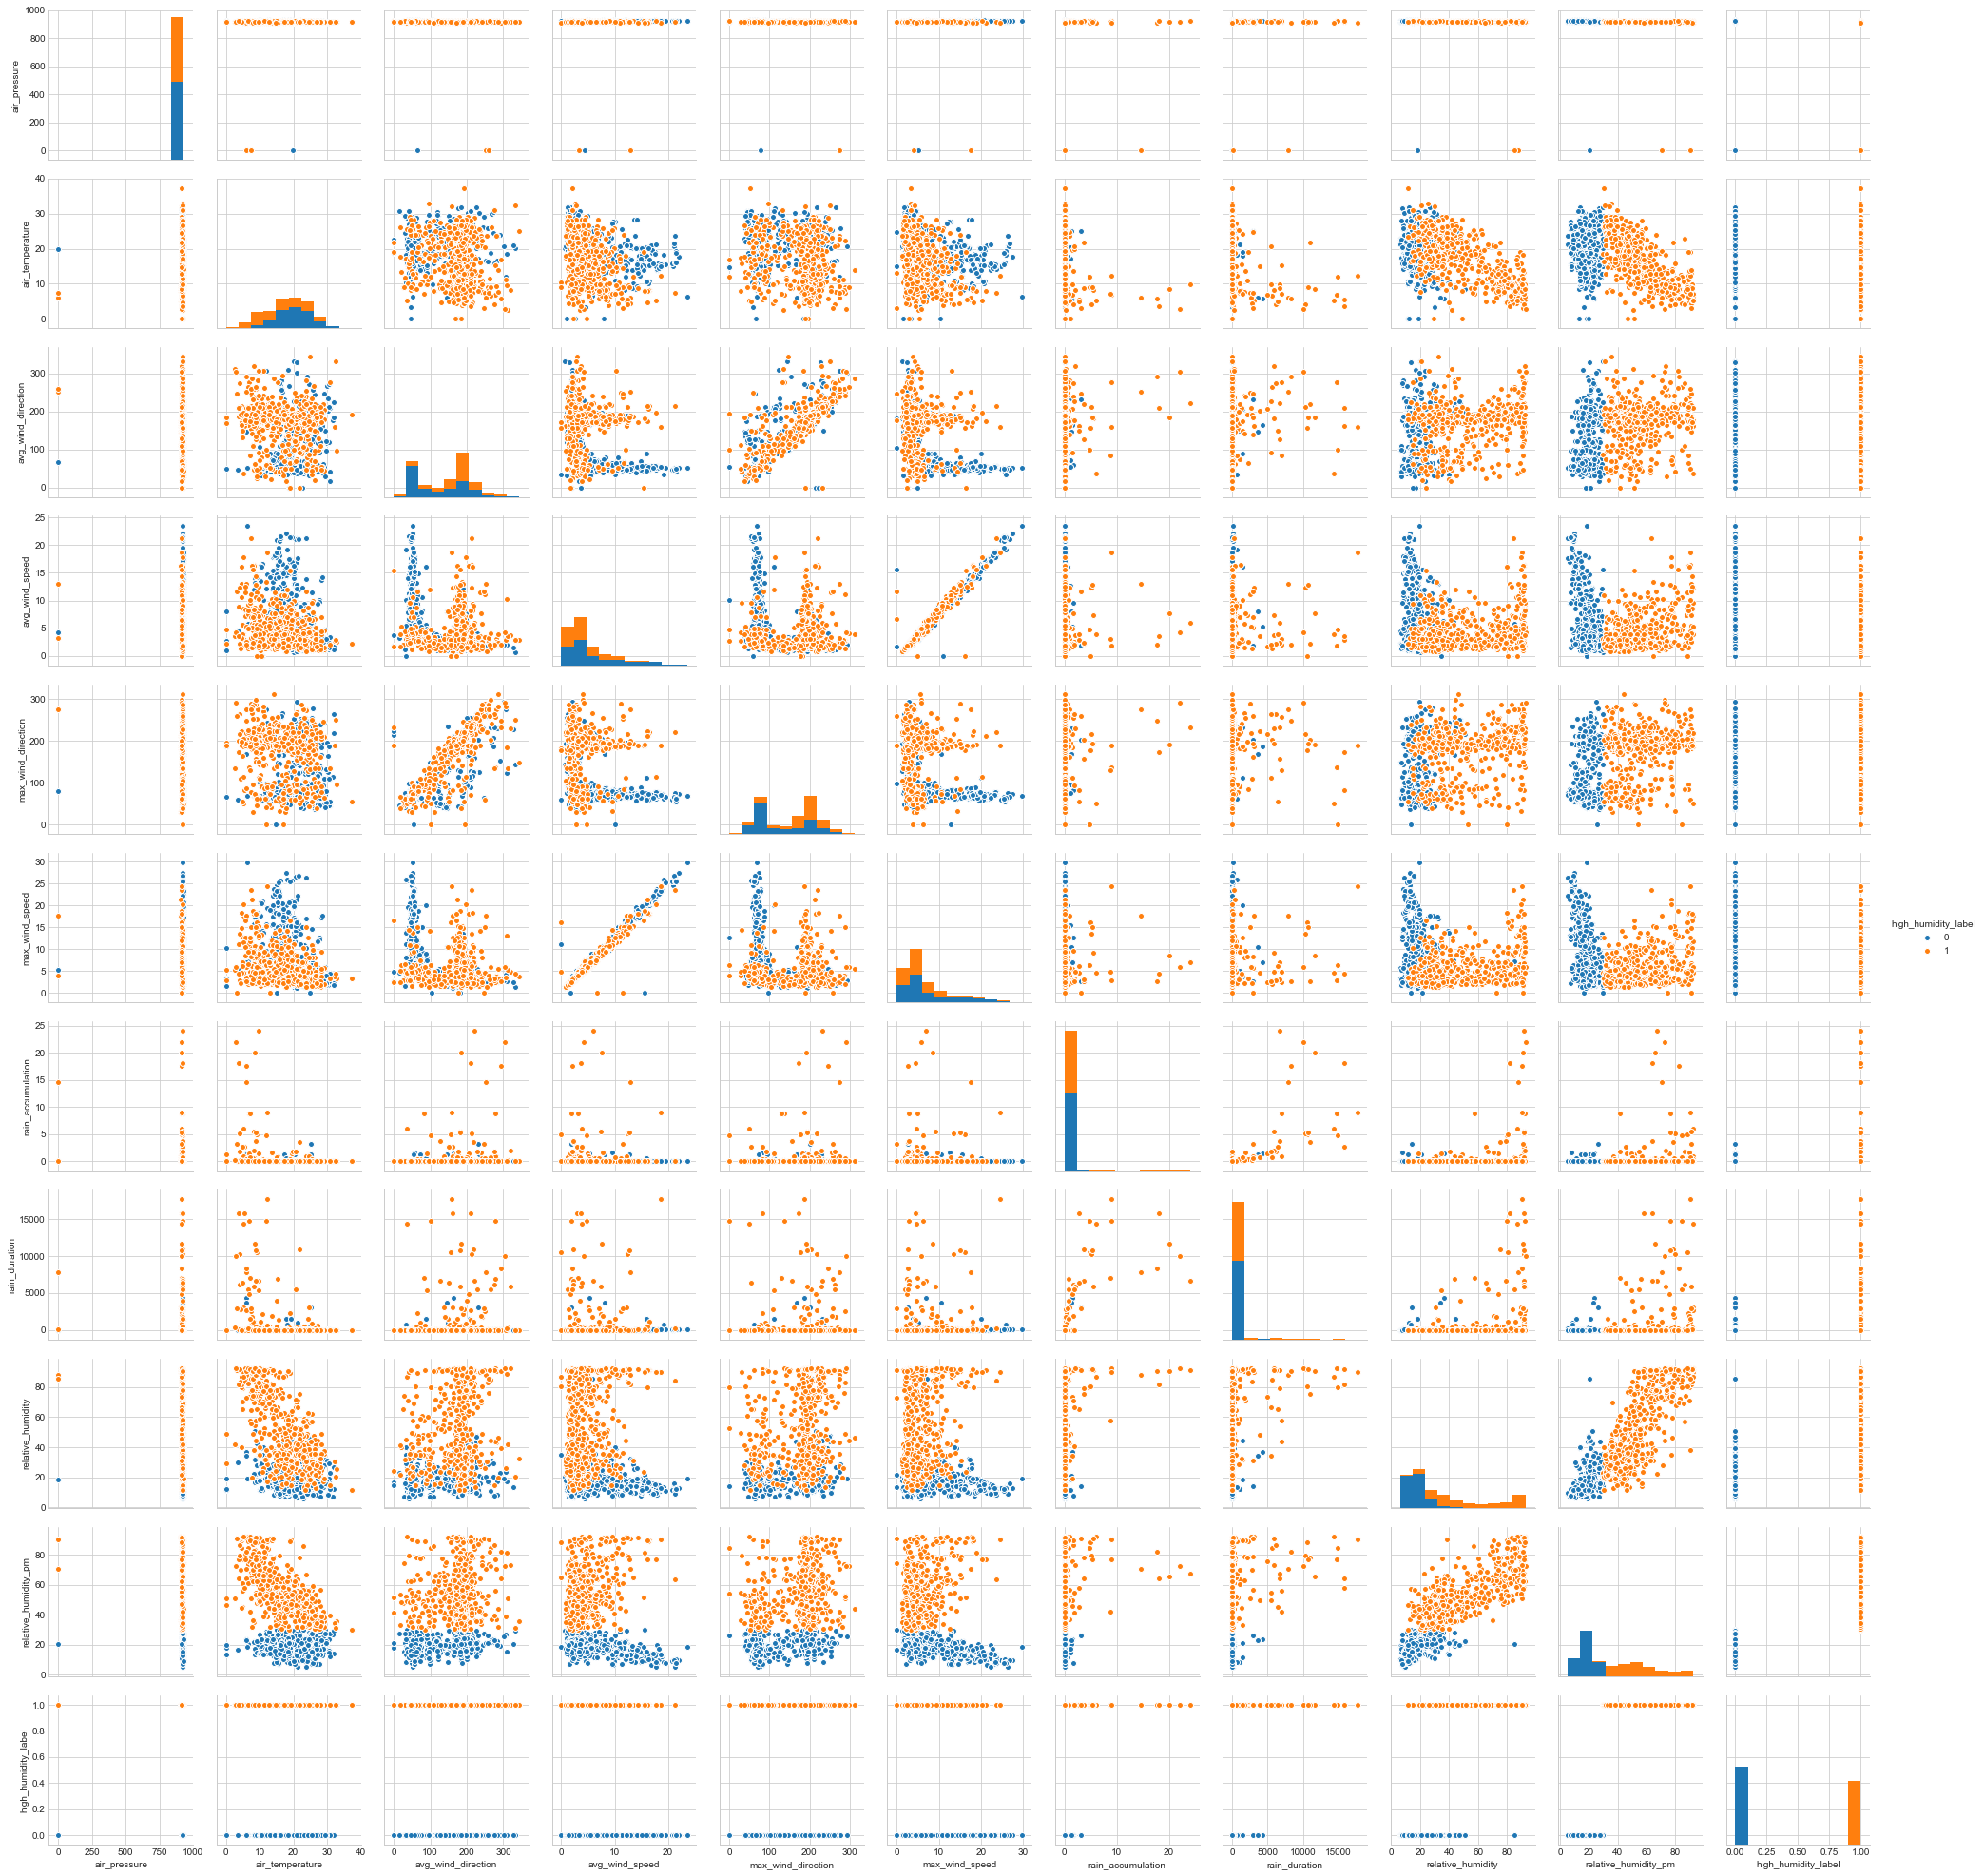

In [146]:
#performing EAD on data
sns.pairplot(data_clean,hue='high_humidity_label') 
#look at how the columns are related to each other as well as the distribution

In [153]:
from sklearn.model_selection import train_test_split

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [152]:
from sklearn.tree import DecisionTreeClassifier

In [154]:
dtree = DecisionTreeClassifier()

In [155]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Prediction and Evaluation

Let's evaluate our decision tree.


In [156]:
predictions = dtree.predict(X_test)

In [157]:
from sklearn.metrics import classification_report,confusion_matrix

In [158]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99       182
          1       1.00      0.99      0.99       147

avg / total       0.99      0.99      0.99       329



In [159]:
print(confusion_matrix(y_test,predictions))

[[182   0]
 [  2 145]]


Random Forests

Now let's compare the decision tree model to a random forest.


In [160]:
from sklearn.ensemble import RandomForestClassifier
#build the random forest classifier
rfc = RandomForestClassifier(n_estimators=300) # n_estimators is the number of trees in the forest.
rfc.fit(X_train, y_train)

C:\Users\PMIKE\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [161]:
rfc_pred = rfc.predict(X_test)

In [162]:
print(confusion_matrix(y_test,rfc_pred))

[[182   0]
 [  2 145]]


In [163]:
print(classification_report(y_test,rfc_pred))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99       182
          1       1.00      0.99      0.99       147

avg / total       0.99      0.99      0.99       329



So it's a little hard to tell which performed better because it really depends on what you value whether you're Valley precision or recall and if you value it for being absent or present. So it's probably more important to realize that it's still present versus it's absent. But again it really depends on the situation and the patient itself and what costs are associated with those decisions.

But it's also useful to compare is the confusion matrix here and see those that were mislabelled.

The random forest will always do better than the decision trees for larger datasets


In [164]:
data_clean['high_humidity_label'].value_counts() #we have imbalanced dataset

0    602
1    493
Name: high_humidity_label, dtype: int64